---
# Imports

In [2]:
from __future__         import division

import os
import tarfile
import urllib

from datetime           import datetime
from sklearn.cluster    import KMeans
from IPython.display    import display
from typing             import List

import pandas               as pd
import numpy                as np
import plotly.graph_objs    as go

In [3]:
# DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
DOWNLOAD_ROOT = "https://github.com/LinkedInLearning/machine-learning-marketer-2460053/"
HOUSING_PATH  =  os.path.join("datasets", "OnlineRetail")
HOUSING_URL   =  DOWNLOAD_ROOT + "OnlineRetail.csv.zip"

In [4]:
# Pandas anweisen, immer alle Zeilen und Spalten eines Datenrahmens anzuzeigen
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# Set the random state for the whole notebook
rand_state=1

--- 
# FUNCTIONS

---
# Schritt 1: Grundlegende Datenaufbereitung / Exploration

Datenquelle = Online Retail Dataset: alle Einkäufe, die für ein Online-Einzelhandelsunternehmen mit Sitz im Vereinigten Königreich während eines Zeitraums von etwa 12 Monaten getätigt wurden.

Chen, Daqing, Sai Laing Sain, and Kun Guo. "Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining." Journal of Database Marketing & Customer Strategy Management 19.3 (2012): 197-208.

Eine CSV-Datei wird mit Ihrem Kursmaterial bereitgestellt. Wenn Sie die Datei direkt von der Quelle herunterladen möchten, können Sie "Online Retail.xlsx" von der folgenden URL herunterladen und in eine CSV-Datei umwandeln: https://archive.ics.uci.edu/ml/datasets/online+retail

### Daten Lesen; Einfache Preprocessing

In [6]:
# Die Daten lesen
# Ersetzen Sie "OnlineRetail.csv" durch den Pfad zu dem Ort, an dem Sie die Datei gespeichert haben
# Es wird empfohlen, die Daten am gleichen Ort wie dieses Notebook zu speichern.
df_data = pd.read_csv('C:\\Users\\x450950\\OneDrive - OMV Group\\Desktop\\OnlineRetail.csv', encoding='unicode-escape')
df_data.head() # Show the first five rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df_data.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [18]:
# Show a random sample of 20 rows
display(df_data.sample(20))
df_data.shape

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
302465,563432,22374,AIRLINE BAG VINTAGE JET SET RED,2,2011-08-16 12:12:00,4.25,16713.0,United Kingdom
198122,554014,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,2011-05-20 13:13:00,0.95,13856.0,United Kingdom
222159,556365,21156,RETROSPOT CHILDRENS APRON,2,2011-06-10 11:44:00,1.95,16370.0,United Kingdom
73943,542397,22966,GINGERBREAD MAN COOKIE CUTTER,24,2011-01-27 15:22:00,1.25,13328.0,United Kingdom
530997,580893,84817,DANISH ROSE DECORATIVE PLATE,6,2011-12-06 12:38:00,0.39,17290.0,United Kingdom
69858,541987,21706,FOLDING UMBRELLA RED/WHITE POLKADOT,2,2011-01-24 16:05:00,4.95,14130.0,United Kingdom
452004,575305,23502,PLAYING CARDS VINTAGE DOILY,12,2011-11-09 12:45:00,1.25,14188.0,United Kingdom
152368,549587,22914,BLUE COAT RACK PARIS FASHION,3,2011-04-11 10:01:00,4.95,15737.0,United Kingdom
427541,573390,23455,SMALL PARLOUR PICTURE FRAME,6,2011-10-30 14:53:00,2.89,17213.0,United Kingdom
215837,555738,22766,PHOTO FRAME CORNICE,8,2011-06-07 09:44:00,2.95,16825.0,United Kingdom


(401604, 8)

In [19]:
# Display basic information about the data (e.g. data types)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [20]:
# nans entfernen (nur für CustomerID, Description ist kein Problem)
print(df_data.isna().sum())
df_data.dropna(inplace=True, subset=['CustomerID'])
# By specifying inplace=True, we manipulate df_data directly. Otherwise the function would only return a copy of 
# the dataframe, which we would need to save somehow, e.g. with: 
# df_data = df_data.dropna(subset=['CustomerID'])
f"Data shape after dropping nans: {df_data.shape}"

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


'Data shape after dropping nans: (401604, 8)'

In [21]:
# Konvertiert den Typ von 'InvoiceDate' in datetime
df_data.InvoiceDate = pd.to_datetime(df_data.InvoiceDate)
f"Min/max dates: {df_data.InvoiceDate.min()}, {df_data.InvoiceDate.max()}"

'Min/max dates: 2010-12-01 08:26:00, 2011-12-09 12:50:00'

In [22]:
# Doppelte Zeilen entfernen
duplicates = df_data.duplicated(keep='first')
df_data = df_data[~duplicates]
f"Num duplicates: {duplicates.sum()}. Data shape after dropping duplicates: {df_data.shape}"

'Num duplicates: 0. Data shape after dropping duplicates: (401604, 8)'

### Daten Verstehen

In [23]:
# Die numerischen Werte anschauen
print(f"Number of customers: {df_data.CustomerID.nunique()}, number of transactions: {df_data.InvoiceNo.nunique()}")
print(f"Description of numeric values:")
df_data[['Quantity', 'UnitPrice']].describe().round(3) 

Number of customers: 4372, number of transactions: 22190
Description of numeric values:


,Quantity,UnitPrice
count,401604.000,401604.000
mean,12.183,3.474
std,250.283,69.764
min,-80995.000,0.000
25%,2.000,1.250
50%,5.000,1.950
75%,12.000,3.750
max,80995.000,38970.000


Es gibt einige Artikel, bei denen UnitPrice == 0 ist. Lassen Sie uns herausfinden, warum.

In [24]:
# Explore data where UnitPrice == 0
df_zero_price = df_data.query('UnitPrice == 0')
# Alternativ
# df_zero_price = df_data[df_data.UnitPrice == 0]
print(f"Num transactions where UnitPrice == 0: {len(df_zero_price)}")
df_zero_price

Num transactions where UnitPrice == 0: 40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


Es gibt nur 40 Zeilen, in denen UnitPrice == 0 ist, so dass wir sie getrost weglassen können.

In [25]:
# Remove transactions where UnitPrice == 0
df_data = df_data.query('UnitPrice > 0')
print(f"Data shape after dropping transactions where UnitPrice == 0: {df_data.shape}")

Data shape after dropping transactions where UnitPrice == 0: (401564, 8)


__Challenge: Arbeiten mit Pandas query()__

Pandas query() ist eine experimentelle neue Funktion mit einer (meiner Meinung nach) einfachen und intuitiven Syntax. In der Pandas-Dokumentation [1] heißt es außerdem, dass es bei großen Datensätzen (über 200.000 Zeilen, wie wir sie haben) einen kleinen Geschwindigkeitszuwachs gegenüber der Python-Indizierung bringen kann. 

Wenn Sie noch nie mit query() gearbeitet haben, finden Sie hier einige Beispiele für die Verwendung:

- String ist gleich: df.query('Land == "Australien"')
- Mathematische Operationen: df.query('Einkommen_Main+Einkommen_Sonstige > 60000'), df.query('Punktzahl_Dezimal * 100 != Punktzahl_Prozent') # z.B. um zu sehen, welche prozentualen Punktzahlen nicht korrekt berechnet wurden

- Vergleich mit einem Variablennamen: favourite_song='Gimme Shelter', df.query('Song == @favourite_song')
- Prüfen, ob Element in einer Liste: df.query("Zutat in ['Eierr','Mehl']")

Vervollständigen Sie mit diesen Hinweisen die folgenden Aufgaben (Um Ihr Notebook nicht zu verlangsamen, verwenden Sie .head(), um nur die ersten 5 Zeilen eines jeden Ergebnisses anzuzeigen.):

- Transaktionen anzeigen, die *nicht* in dem 'United Kingdom' stattgefunden haben.
- Transaktionen anzeigen, bei denen der Wert (Menge * Stückpreis) £2000 übersteigt (alle Transaktionen sind in £).
- Eine Variable definieren, die das Produkt '23168' bezeichnet (Achtung: Der StockCode ist eine Zeichenkette und keine Zahl, daher muss er in Anführungszeichen angegeben werden). Transaktionen für diesen Artikel anzeigen.
- Transaktionen für der folgenden Artikel anzeigen: ['CHILDS GARDEN TROWEL PINK',
 'CREAM SWEETHEART MINI CHEST',
 'LUNCH BAG CARS BLUE',
 'WALL ART DOLLY GIRL ',
 'CHRISTMAS TREE HANGING GOLD']
 
 
Schreiben Sie Ihren Code in eine neue Zelle, unten. Sie können eine neue Zelle hinzufügen, indem Sie "Esc" gedrückt halten und die "B"-Taste drücken, oder klicken Sie einfach auf die Plus-Schaltfläche im oberen Menü, wie so:

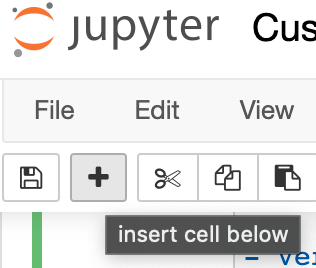

Die Lösung finden Sie unten.

[1] https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html Siehe den Abschnitt 'Performance of query()'.

In [26]:
temp_stockcode = '23168'

display(
    df_data
        # .query("Country != 'United Kingdom'")
        # .query("Quantity * UnitPrice >= 2000")
        # .query("StockCode == @temp_stockcode")
        .query("Description in ['CHILDS GARDEN TROWEL PINK', 'CREAM SWEETHEART MINI CHEST', 'LUNCH BAG CARS BLUE', 'WALL ART DOLLY GIRL ', 'CHRISTMAS TREE HANGING GOLD']")
        .sample(20)
)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
306974,563858,85066,CREAM SWEETHEART MINI CHEST,2,2011-08-19 16:04:00,12.75,18170.0,United Kingdom
208648,555125,20728,LUNCH BAG CARS BLUE,10,2011-05-31 15:26:00,1.65,13481.0,United Kingdom
218609,556056,20728,LUNCH BAG CARS BLUE,2,2011-06-08 13:35:00,1.65,17841.0,United Kingdom
21423,538078,85066,CREAM SWEETHEART MINI CHEST,2,2010-12-09 14:25:00,12.75,16255.0,United Kingdom
207387,554987,85066,CREAM SWEETHEART MINI CHEST,1,2011-05-29 12:48:00,12.75,14823.0,United Kingdom
363962,568593,85066,CREAM SWEETHEART MINI CHEST,4,2011-09-28 10:54:00,12.75,13988.0,United Kingdom
397562,571189,23222,CHRISTMAS TREE HANGING GOLD,12,2011-10-14 11:42:00,0.83,13213.0,United Kingdom
396193,C571059,85066,CREAM SWEETHEART MINI CHEST,-1,2011-10-13 14:27:00,12.75,17813.0,United Kingdom
246970,558750,20728,LUNCH BAG CARS BLUE,20,2011-07-03 10:47:00,1.65,18226.0,United Kingdom
337028,566424,20728,LUNCH BAG CARS BLUE,10,2011-09-12 14:15:00,1.65,13309.0,United Kingdom


In [27]:
# Challenge: Working with Pandas query() - solutions
print("Transactions which did not occur in the United Kingdom:")
display(df_data.query('Country != "United Kingdom"').sample(5))

print("\nTransactions where the total value exceeded £2000:")
display(df_data.query('Quantity*UnitPrice > 2000').sample(5))

print("\nTransactions for product 23168:")
stock_code = '23168'
display(df_data.query('StockCode == @stock_code').sample(5))

print("\nTransactions for any of a given list of products:")
product_list = ['CHILDS GARDEN TROWEL PINK', 'CREAM SWEETHEART MINI CHEST', 'LUNCH BAG CARS BLUE',
                'WALL ART DOLLY GIRL ', 'CHRISTMAS TREE HANGING GOLD']
display(df_data.query(f'Description in {product_list}').sample(5))

# Notice the use of display() here. We didn’t need it when viewing dataframes before, because it was always the
# last line of the cell, which Jupyter displays automatically. We don't need it on the last line of this cell,
# but I left it here for visual consistency.

Transactions which did not occur in the United Kingdom:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
405983,571724,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-10-19 08:20:00,3.75,12572.0,Germany
9717,537212,22346,PARTY PIZZA DISH GREEN POLKADOT,12,2010-12-05 15:21:00,0.85,12720.0,Germany
188223,553017,20728,LUNCH BAG CARS BLUE,3,2011-05-12 19:01:00,1.65,12757.0,Portugal
19818,537894,POST,POSTAGE,2,2010-12-09 10:16:00,18.00,12621.0,Germany
47407,540414,22908,PACK OF 20 NAPKINS RED APPLES,24,2011-01-07 10:32:00,0.85,12481.0,Germany



Transactions where the total value exceeded £2000:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
343000,566927,M,Manual,1,2011-09-15 15:20:00,2033.10,17846.0,United Kingdom
437480,574294,21915,RED HARMONICA IN BOX,2100,2011-11-03 15:47:00,1.06,16333.0,United Kingdom
19871,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,2010-12-09 10:44:00,2.55,12755.0,Japan
343138,566934,48138,DOORMAT UNION FLAG,500,2011-09-15 15:34:00,4.58,18102.0,United Kingdom
16441,537659,22833,HALL CABINET WITH 3 DRAWERS,72,2010-12-07 16:43:00,32.69,18102.0,United Kingdom



Transactions for product 23168:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
484140,577522,23168,CLASSIC CAFE SUGAR DISPENSER,1,2011-11-20 13:23:00,1.25,15988.0,United Kingdom
375724,569474,23168,CLASSIC CAFE SUGAR DISPENSER,1,2011-10-04 12:39:00,1.25,14178.0,United Kingdom
258681,C559667,23168,CLASSIC CAFE SUGAR DISPENSER,-2,2011-07-11 13:38:00,1.25,13267.0,United Kingdom
516515,C579924,23168,CLASSIC CAFE SUGAR DISPENSER,-3,2011-12-01 09:13:00,1.25,16293.0,United Kingdom
369664,569082,23168,CLASSIC CAFE SUGAR DISPENSER,24,2011-09-30 11:55:00,1.25,18229.0,United Kingdom



Transactions for any of a given list of products:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
138486,548198,22521,CHILDS GARDEN TROWEL PINK,1,2011-03-29 16:05:00,0.85,16712.0,United Kingdom
446785,574920,20728,LUNCH BAG CARS BLUE,10,2011-11-07 16:34:00,1.65,13985.0,United Kingdom
248919,558876,20728,LUNCH BAG CARS BLUE,2,2011-07-04 13:36:00,1.65,17841.0,United Kingdom
176984,552039,20728,LUNCH BAG CARS BLUE,10,2011-05-06 08:10:00,1.65,13081.0,United Kingdom
468182,576399,20728,LUNCH BAG CARS BLUE,10,2011-11-15 10:50:00,1.65,12684.0,France


In [31]:
df_data.UnitPrice.sort_values(ascending=False).head(30)

222681    38970.00
173382     8142.75
173277     8142.75
173391     6930.00
268027     4287.63
422376     4161.06
422375     4161.06
422351     4161.06
406406     3949.32
406404     3949.32
374542     3155.95
293842     3155.95
271151     3060.60
297438     2500.00
144831     2382.92
144826     2382.92
406405     2118.74
406407     2118.74
144829     2053.07
144834     2053.07
343000     2033.10
150591     1867.86
150615     1867.86
342996     1829.84
73446      1715.85
117055     1687.17
117053     1687.17
117054     1687.17
117052     1687.17
528082     1599.26
Name: UnitPrice, dtype: float64

In [32]:
# Explore the UnitPrice values above 95th quantile
(df_data
    .drop_duplicates(['StockCode', 'UnitPrice'])
    .query('UnitPrice > UnitPrice.quantile(.95)')
    .sort_values(by='UnitPrice', ascending=False)
    .head(100)
)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom
173391,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom
268027,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France
406404,C571750,M,Manual,-1,2011-10-19 11:16:00,3949.32,12744.0,Singapore
293842,C562647,M,Manual,-1,2011-08-08 12:56:00,3155.95,15502.0,United Kingdom
271151,C560647,M,Manual,-1,2011-07-20 11:31:00,3060.60,18102.0,United Kingdom
297438,562946,M,Manual,1,2011-08-11 09:38:00,2500.00,15581.0,United Kingdom
144826,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore


In [34]:
# Explore UnitPrice per Description
(df_data
 .groupby('Description')
 .mean()
 .sort_values(by='UnitPrice', ascending=False)
 .head(25)
)

# A note on groupby(), for the unsure:
# groupby() splits the data frame into 'chunks', one for each unique value in the given column (here 'Description').
# Then for each chunk, it applies the function after the groupby; here it gets the mean() per column, per chunk.
# The result is a dataframe with an index containing all the descriptions, and then three numeric columns,
# containing the mean Quantity, UnitPrice and CustomerID per description (clearly mean CustomerID makes no sense)
# We then sort this data frame by ascending UnitPrice, and display the first 25 rows

,Quantity,UnitPrice,CustomerID
Description,,,
DOTCOM POSTAGE,1.000000,744.147500,14096.000000
PICNIC BASKET WICKER 60 PIECES,30.500000,649.500000,15098.000000
CRUK Commission,-1.000000,495.839375,14096.000000
Manual,6.471366,342.511938,15303.317181
REGENCY MIRROR WITH SHUTTERS,1.428571,156.428571,14459.285714
RUSTIC SEVENTEEN DRAWER SIDEBOARD,1.103448,156.034483,14723.034483
VINTAGE RED KITCHEN CABINET,1.086957,150.663043,15782.304348
VINTAGE BLUE KITCHEN CABINET,0.769231,143.653846,15391.461538
CHEST NATURAL WOOD 20 DRAWERS,1.846154,118.076923,15666.076923


In [35]:
# Let's find the stock codes which seem to be causing the bulk of the strange values
[sc for sc in df_data.StockCode.unique() if not sc.isnumeric()]

['85123A',
 '84406B',
 '84029G',
 '84029E',
 'POST',
 '82494L',
 '85099C',
 '84997B',
 '84997C',
 '84519A',
 '85183B',
 '85071B',
 '37444A',
 '37444C',
 '84971S',
 '15056BL',
 '15056N',
 'D',
 '35004C',
 '85049A',
 '85099B',
 '35004G',
 '85014B',
 '85014A',
 '84970S',
 '84030E',
 '35004B',
 '85049E',
 '17091A',
 '84509A',
 '84510A',
 '84709B',
 '84625C',
 '84625A',
 '47570B',
 '85049C',
 '85049D',
 '85049G',
 '84970L',
 '90199C',
 '90129F',
 '90210B',
 '72802C',
 '85169B',
 '85099F',
 '85184C',
 '35591T',
 '84032B',
 '85049H',
 '72800E',
 '84849B',
 '90200B',
 '90059B',
 '90185C',
 '90059E',
 '90059C',
 '90200C',
 '90200D',
 '90200A',
 '16258A',
 '85231B',
 '85231G',
 '48173C',
 '47563A',
 '84558A',
 '46000M',
 '71406C',
 '84985A',
 '84596E',
 '84997D',
 '47599A',
 '47599B',
 '85035B',
 '84968C',
 '72800B',
 '84563A',
 '47504H',
 '17164B',
 '15044B',
 '84569B',
 '85114B',
 '85114C',
 '85199L',
 '85199S',
 '85019A',
 '85019C',
 '85071A',
 '85071C',
 '85135B',
 '85136A',
 '85136C',
 'C2'

In [38]:
# Let's refine the unusual stock codes
[sc for sc in df_data.StockCode.unique() if not sc[:-1].isnumeric()]

['POST', '15056BL', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']

__Challenge: Indizierung in Python (für die Ungeübte)__

Wenn Sie bereits mit der Indizierung in Python vertraut sind, können Sie diese Zelle überspringen. 

In [69]:
# Challenge: Python indexing for the unfamiliar:

# The indexing used in sc[:-1], above, works as follows:
# A number inside the brackets would indicate only the character at that position.
# eg. 'Hello World'[0] selects 'H'
# Notice that indexes start with 0, not 1. So 'Hello World' is 11 characters, with indexes [0,1,2,3,4,5,6,7,8,9,10]
# A negative number counts backwards, e.g. 'Hello World'[-1] selects 'd' (it's the same as 'Hello World'[10]
# but saves you from having to count the length of the string and subtract 1)
# You can specify a start and end range using : and giving a start and end value.
# This will select from (including) the start value up to (but excluding) the end value
# e.g. 'Hello World'[1:-1] and 'Hello World'[1:10] will both select 'ello Worl'
# You don't have to include a start AND end value; you can leave out either, as long as you include the :
# e.g. for a stock code sc='85123A', we get sc[:-1] selects '85123'

# Feel free to use this cell to write some examples and play around. Try to answer these questions:
# If you have a 5 letter string, what's the highest index you can use?
# Why is it smaller than the length of the string?
# What will you get from 'abcdefghijklmnop'[4:-4]?
# What is your full name, ignoring the first two and last three letters?
# What will be the results of '123abc'.isnumeric()? What about '123abc'[:3].isnumeric()
# What about '123abc'.isalpha()? Or '123abc'[3:].isalpha()? (isalpha() checks whether a string is all alphabetical)
# What happens if you select an end index which is equal to or greater than the length of your string? Try it!

# If you run into an IndexError while experimenting, perfect! That means you're doing it right. 
# But errors are ugly, so when you're finished, you can clear your output by clicking this cell
# and selecting from the top menu Cell > Current Outputs > Clear)
df_data.StockCode.str.isalpha().sample(5)

322021    False
443716    False
451851    False
279499    False
134344    False
Name: StockCode, dtype: bool

In [48]:
# Challenge: Python indexing for the unfamiliar - solution:
# If you have a 5 letter string, what's the highest index you can use? --> 4
# Why is it smaller than the length of the string? --> Because indexes start at 0, i.e. 'Hello' = [0,1,2,3,4]
# What will you get from 'abcdefghijklmnop'[4:-4]? --> 'efghijkl'
# What is your name, ignoring the first two and last three letters? --> 'Katherine'[2:-3] --> 'ther'
# What will be the results of '123abc'.isnumeric()? What about '123abc'[:3].isnumeric() --> False, True
# What about '123abc'.isalpha()? Or '123abc'[3:].isalpha()? --> False, True
# What happens if you select an end index which is equal to or greater than the length of your string? Try it!
# --> '123abc'[10] --> IndexError: string index out of range

In [62]:
# Display the data for a specific StockCode of interest
df_data.query("StockCode == '15056BL' & Country == 'United Kingdom' & Quantity == 1")
# Alternativ: 
# df_data[df_data.StockCode == '15056BL']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7113,536989,15056BL,EDWARDIAN PARASOL BLACK,1,2010-12-03 15:10:00,5.95,17238.0,United Kingdom
7477,537042,15056BL,EDWARDIAN PARASOL BLACK,1,2010-12-05 10:45:00,5.95,13838.0,United Kingdom
23513,538205,15056BL,EDWARDIAN PARASOL BLACK,1,2010-12-10 11:24:00,5.95,12748.0,United Kingdom
28628,538651,15056BL,EDWARDIAN PARASOL BLACK,1,2010-12-13 15:07:00,5.95,15311.0,United Kingdom
37306,539456,15056BL,EDWARDIAN PARASOL BLACK,1,2010-12-17 17:23:00,5.95,16885.0,United Kingdom
43493,540093,15056BL,EDWARDIAN PARASOL BLACK,1,2011-01-04 15:24:00,5.95,16725.0,United Kingdom
44168,540157,15056BL,EDWARDIAN PARASOL BLACK,1,2011-01-05 11:41:00,5.95,15311.0,United Kingdom
61818,541485,15056BL,EDWARDIAN PARASOL BLACK,1,2011-01-18 13:05:00,5.95,18118.0,United Kingdom
85140,543463,15056BL,EDWARDIAN PARASOL BLACK,1,2011-02-08 14:06:00,5.95,15311.0,United Kingdom
87171,543639,15056BL,EDWARDIAN PARASOL BLACK,1,2011-02-10 16:52:00,5.95,16725.0,United Kingdom


In [74]:
df_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Quantity,401564.0,12.15,249.51,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401564.0,3.47,69.77,0.0,1.25,1.95,3.75,38970.0
CustomerID,401564.0,15281.27,1713.98,12346.0,13939.00,15145.00,16788.00,18287.0


In [72]:
# Describe the UnitPrice distribution for the unusual stock codes
unusual_codes = ['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT']
for sc in unusual_codes:
    # The use of \n in the string prints a newline, which is just done for my own visual preferencce
    print(f'\nData described, where StockCode == {sc}')
    # We need 'display' since we are looping, so we can't just rely on Jupyter outputting the last line of the cell
    display(df_data.query(f"StockCode == '{sc}'")[['UnitPrice']]
                .describe()
                .round(3)
                .T
            )
                # 'T' for 'Transpose' flips the dataframe from being tall and skinny to short and wide.
                # You can re-run the cell with a # in front of the .T, if you are curious how it would look.


Data described, where StockCode == POST


,count,mean,std,min,25%,50%,75%,max
UnitPrice,1196.0,37.889,334.122,1.0,18.0,18.0,18.0,8142.75



Data described, where StockCode == D


,count,mean,std,min,25%,50%,75%,max
UnitPrice,77.0,72.485,219.271,0.01,13.88,22.97,57.6,1867.86



Data described, where StockCode == C2


,count,mean,std,min,25%,50%,75%,max
UnitPrice,134.0,50.134,9.606,18.0,50.0,50.0,50.0,150.0



Data described, where StockCode == M


,count,mean,std,min,25%,50%,75%,max
UnitPrice,454.0,342.512,1957.716,0.03,0.85,3.54,118.088,38970.0



Data described, where StockCode == BANK CHARGES


,count,mean,std,min,25%,50%,75%,max
UnitPrice,12.0,13.75,4.33,0.001,15.0,15.0,15.0,15.0



Data described, where StockCode == PADS


,count,mean,std,min,25%,50%,75%,max
UnitPrice,3.0,0.001,0.0,0.001,0.001,0.001,0.001,0.001



Data described, where StockCode == DOT


,count,mean,std,min,25%,50%,75%,max
UnitPrice,16.0,744.148,540.83,11.17,389.082,715.85,998.635,1599.26


(1892, 8)

(399672, 8)

Unique Customers per Stock Code: unusual Stock Codes


StockCode,BANK CHARGES,C2,D,DOT,M,PADS,POST
CustomerID,10,29,24,1,272,3,379


,CustomerID
StockCode,
BANK CHARGES,10
C2,29
D,24
DOT,1
M,272
PADS,3
POST,379


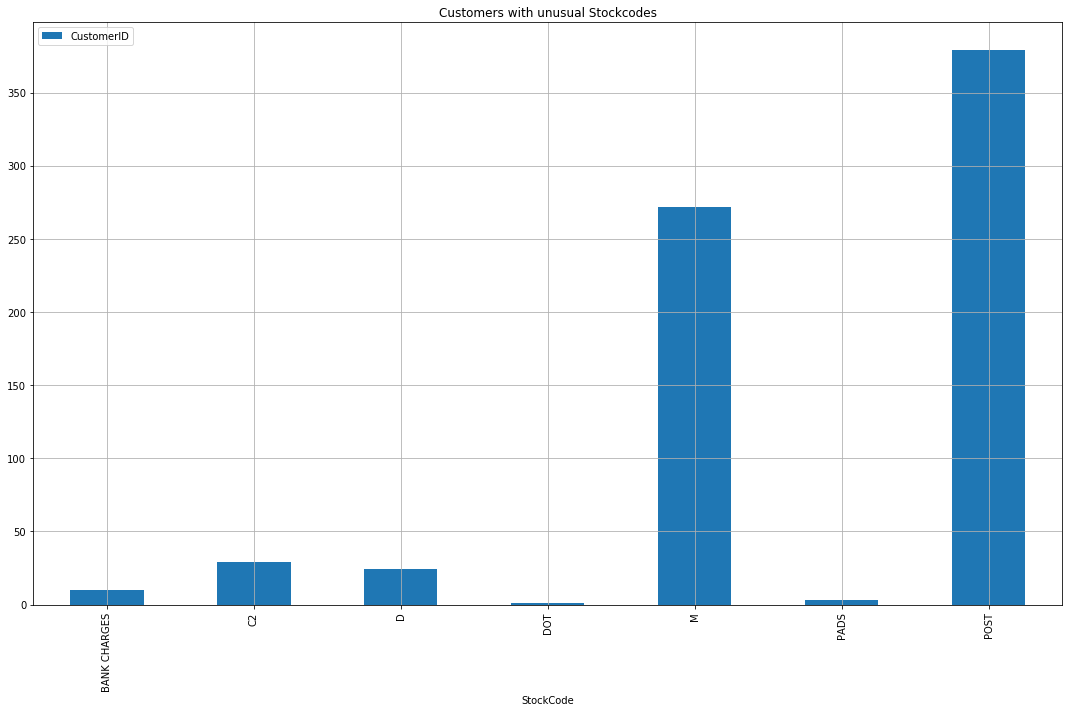

Overview Unique Customers per Stock Code: Normal Stock Codes


,count,mean,std,min,25%,50%,75%,max
CustomerID,3677.0,73.0,92.0,1.0,10.0,39.0,100.0,887.0


In [106]:
# Do only a small group of customers use the unusual stock codes? Part 1: Customers per Stock Code
sc_unusual = df_data.query('StockCode     in @unusual_codes')
sc_normal  = df_data.query('StockCode not in @unusual_codes')

display(sc_unusual.shape, sc_normal.shape)
print('Unique Customers per Stock Code: unusual Stock Codes')
display(sc_unusual
        .groupby('StockCode')
        .agg({'CustomerID': 'nunique'})
        .T)
temp_data = sc_unusual.groupby('StockCode').agg({'CustomerID': 'nunique'})
display(temp_data)
import matplotlib.pyplot as plt
temp_data.plot(kind="bar", figsize=(15,10), title="Customers with unusual Stockcodes")
plt.grid()
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

print('Overview Unique Customers per Stock Code: Normal Stock Codes')
display(sc_normal
        .groupby('StockCode')
        .agg({'CustomerID': 'nunique'})
        .describe()
        .round(0)
        .T)

# A note on agg(), for the unfamiliar:
# We've seen that Pandas' groupby() splits the dataframe into one chunk per unique value in the given column.
# We then have to perform some kind of aggregation on eacch of those chunks. So far we've used mean();
# Here, we use agg() and specify a dictionary of ColumnName: function.
# We are asking: for  each chunk of the data representing one StockCode, how many unique CustomerIDs are there?
# Note that because we only specify one column:function pair here, we'll only get one column back as a result.
# However, one can use multiple pairs, to specify different aggregations for different columns. 

__Challenge: Anzeige der Anzahl der eindeutigen StockCodes pro Kunde__

In der letzten Zelle teilten wir die Daten in sc_unusual, d. h. alle Transaktionen mit ungewöhnlichen Bestandscodes, und sc_normal, d. h. alle anderen. Dann erhielten wir für jeden StockCode die Anzahl der eindeutigen Kunden-IDs. Bei den normalen Lagerbestandsdaten hätte dies zu einer großen Anzahl von Zeilen geführt, so dass wir eine describe()-Funktion hinzugefügt haben, um die Ergebnisse zusammenzufassen.

Diesmal ist die Logik genau umgekehrt. Sowohl für sc_unusual als auch für sc_normal wollen wir die Anzahl der eindeutigen Bestandscodes pro CustomerID anzeigen. Und da es sehr viele CustomerIDs gibt, wollen wir wieder die Funktion summary verwenden. Sind Sie der Herausforderung gewachsen? Fügen Sie eine neue Zelle hinzu (Esc+B) und probieren Sie es aus, bevor Sie mit dem Video fortfahren. Viel Erfolg!

In [107]:
# Solution: Do only a small group of customers use the unusual stock codes? Part 2: Stock Codes per Customer
print('Unique Stock Codes per Customer: unusual Stock Codes')
display(sc_unusual
        .groupby('CustomerID')
        .agg({'StockCode': 'nunique'})
        .describe()
        .round(3)
        .T
        )

print('Overview Unique Stock Codes per Customer: Normal Stock Codes')
display(sc_normal
        .groupby('CustomerID')
        .agg({'StockCode': 'nunique'})
        .describe()
        .round(3)
        .T
        )


Unique Stock Codes per Customer: unusual Stock Codes


,count,mean,std,min,25%,50%,75%,max
StockCode,667.0,1.076,0.298,1.0,1.0,1.0,1.0,3.0


Overview Unique Stock Codes per Customer: Normal Stock Codes


,count,mean,std,min,25%,50%,75%,max
StockCode,4362.0,61.185,85.369,1.0,15.0,35.0,77.0,1791.0


Die ungewöhnlichen Lagercodes haben im Allgemeinen nur wenige Kunden (mit Ausnahme von "M" und "POST"), während der Durchschnitt für die anderen Lagercodes bei etwa 72 liegt. Außerdem haben die Kunden in den Daten zu den anormalen Codes jeweils nur etwa einen Lagercode, während die Kunden in den übrigen Daten jeweils etwa 61 Codes haben.  Mit anderen Worten, nur eine sehr kleine Anzahl von Kunden verursacht den Großteil der seltsamen Transaktionen. In Anbetracht der Tatsache, dass diese Transaktionen offensichtlich eher mit Dienstleistungen als mit Produkten zusammenhängen, sollte das Unternehmen diese Kunden getrennt behandeln. Daher werden wir alle Zeilen mit diesen seltsamen Lagercodes streichen.

In [112]:
# Remove the rows with unusual stock codes
df_data = df_data.query('StockCode not in @unusual_codes')
print(f"After dropping rows with unusual stock codes, data shape: {df_data.shape}. Summary:")
display(df_data.describe().round(3))
print(f"Number of customers: {df_data.CustomerID.nunique()}, number of transactions: {df_data.InvoiceNo.nunique()}")

After dropping rows with unusual stock codes, data shape: (399672, 8). Summary:


,Quantity,UnitPrice,CustomerID
count,399672.000,399672.000,399672.000
mean,12.195,2.927,15288.734
std,250.057,5.876,1710.773
min,-80995.000,0.030,12346.000
25%,2.000,1.250,13959.000
50%,5.000,1.950,15152.000
75%,12.000,3.750,16791.000
max,80995.000,1100.440,18287.000


Number of customers: 4362, number of transactions: 21801


__Challenge: Erkunden Sie die Mengenwerte über dem 95. Perzentil__

Bisher haben wir die Transaktionen mit den obersten 5 % der UnitPrice-Werte angezeigt. Können Sie dies wiederholen, aber für die Menge? Wenn Sie einen Hinweis benötigen, klappen Sie die nächste Zelle auf.

In [113]:
# Challenge Hint
# The solution could include some of these steps, but not necessarily in this order: 
# - Sorting values 
# - Querying or otherwise slicing the dataframe df_data
# - Taking the dataframe head()
# - Using the quantile() function
# - Wrapping these steps in brackets () to make a pipeline

In [114]:
# Solution: Explore the Quantity values above 95th percentile
(df_data
 .drop_duplicates(['StockCode', 'UnitPrice'])
 .query('Quantity > Quantity.quantile(.95)')
 .sort_values(by='Quantity', ascending=False)
 .head(100)
)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
91772,544152,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,2400,2011-02-16 12:10:00,0.06,14609.0,United Kingdom
125282,547037,21967,PACK OF 12 SKULL TISSUES,2160,2011-03-20 10:37:00,0.25,14101.0,United Kingdom
160545,550461,21175,GIN + TONIC DIET METAL SIGN,2000,2011-04-18 13:20:00,1.69,15749.0,United Kingdom
160542,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-04-18 13:20:00,2.40,15749.0,United Kingdom


__Challenge: Erforschen Menge pro Beschreibung__
    
Zuvor haben wir den durchschnittlichen Stückpreis pro Beschreibung angezeigt. Können Sie dies wiederholen, aber für die Menge? Wenn Sie einen Hinweis benötigen, klappen Sie die nächste Zelle auf.

In [115]:
# Challenge Hint
# The solution could include some of these steps, but not necessarily in this order: 
# Grouping the data
# Sorting values
# Calculating a mean()
# Viewing the dataframe head()

In [117]:
# Solution: Explore Quantity per Description
(df_data
    .groupby('Description')
    .mean()
    .sort_values(by='Quantity', ascending=False)
    .head(20)
)

,Quantity,UnitPrice,CustomerID
Description,,,
TEA TIME TEA TOWELS,1300.000000,2.325000,15749.000000
GIRLS ALPHABET IRON ON PATCHES,480.000000,0.203043,15062.130435
ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,0.166667,14948.444444
SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,2.550000,14156.000000
SMALL CHINESE STYLE SCISSOR,246.814815,0.401481,15447.537037
MISELTOE HEART WREATH CREAM,240.000000,4.150000,14156.000000
MINI HIGHLIGHTER PENS,210.000000,0.120000,16987.750000
POTTING SHED CANDLE CITRONELLA,201.000000,2.880000,17450.000000
LUNCH BAG RED SPOTTY,200.000000,1.450000,14156.000000


Es gibt nichts Ungewöhnliches an den großen Werten für Menge, also behalten wir diese Zeilen bei; sie enthalten legitime Informationen, die wir modellieren müssen.

Bei der ursprünglichen Beschreibung der numerischen Daten hatte die Menge einen Höchstwert von 80995 und einen Mindestwert von -80995. Woran kann das Ihrer Meinung nach liegen?

In [118]:
# Check for some specific, suspicious values
df_data.query('Quantity in [80995.000000, -80995.000000]')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [135]:
df_invoicenrs = df_data.InvoiceNo.str.startswith("C")
df_data[df_invoicenrs].sample(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
242250,C558326,22551,PLASTERS IN TIN SPACEBOY,-1,2011-06-28 11:59:00,1.65,13300.0,United Kingdom
1981,C536548,22077,6 RIBBONS RUSTIC CHARM,-6,2010-12-01 14:33:00,1.65,12472.0,Germany
290368,C562375,22907,PACK OF 20 NAPKINS PANTRY DESIGN,-12,2011-08-04 14:46:00,0.85,14911.0,EIRE
321971,C565215,21581,SKULLS DESIGN COTTON TOTE BAG,-12,2011-09-01 17:22:00,2.25,16474.0,United Kingdom
206130,C554871,22960,JAM MAKING SET WITH JARS,-2,2011-05-27 10:58:00,4.25,18225.0,United Kingdom
243320,C558444,75049L,LARGE CIRCULAR MIRROR MOBILE,-4,2011-06-29 13:29:00,0.85,15311.0,United Kingdom
193138,C553512,84688,BEACH HUT DESIGN BLACKBOARD,-1,2011-05-17 13:50:00,4.25,15005.0,United Kingdom
400726,C571329,23413,VINTAGE COFFEE GRINDER BOX,-12,2011-10-17 11:32:00,4.15,17706.0,United Kingdom
46881,C540366,20719,WOODLAND CHARLOTTE BAG,-30,2011-01-06 16:14:00,0.72,15061.0,United Kingdom
394065,C570867,21123,SET/10 IVORY POLKADOT PARTY CANDLES,-24,2011-10-12 16:17:00,1.25,12607.0,USA


Eine Rechnungsnummer mit "C" bedeutet eine Rücksendung:

In [136]:
# returns = df_data.query('InvoiceNo.str.startswith("C")')
# Alternativ: 
returns = df_data[df_data['InvoiceNo'].str.startswith('C')]
returns.sample(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
373283,C569320,23112,PARISIENNE CURIO CABINET,-2,2011-10-03 12:19:00,7.50,15301.0,United Kingdom
434078,C574027,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,-24,2011-11-02 12:32:00,1.45,13394.0,United Kingdom
171984,C551510,47566,PARTY BUNTING,-100,2011-04-28 19:43:00,4.15,16163.0,United Kingdom
268242,C560395,22846,BREAD BIN DINER STYLE RED,-2,2011-07-18 13:47:00,14.95,15125.0,United Kingdom
497258,C578355,22178,VICTORIAN GLASS HANGING T-LIGHT,-3,2011-11-24 10:13:00,1.95,14397.0,United Kingdom
297904,C562956,82600,NO SINGING METAL SIGN,-6,2011-08-11 10:14:00,2.10,13186.0,United Kingdom
53472,C540837,21844,RED RETROSPOT MUG,-1,2011-01-11 15:02:00,2.95,14733.0,United Kingdom
152579,C549666,85064,CREAM SWEETHEART LETTER RACK,-1,2011-04-11 12:17:00,4.65,13113.0,United Kingdom
164500,C550648,22697,GREEN REGENCY TEACUP AND SAUCER,-1,2011-04-19 16:36:00,2.95,13134.0,United Kingdom
450091,C575160,23247,BISCUIT TIN 50'S CHRISTMAS,-1,2011-11-08 16:23:00,2.89,14911.0,EIRE


... was wir überprüfen können, indem wir prüfen, ob ein Wert in der Spalte "Menge" größer als 0 ist, wenn die Rechnungsnummer mit "C" beginnt: 

In [138]:
print((returns.Quantity.values > 0).any())

False


In [ ]:
# Define is_return_without_purchase, for identifying such transactions
def is_return_without_purchase(df: pd.DataFrame, df_row: pd.Series) -> bool:
    """
    Determine whether a transaction is a return without a corresponding purchase    
    Args:
        df: a dataframe of transaction data, including at least the columns 'CustomerID', Quantity' and 'StockCode'
        df_row: a row of a dataframe of transaction data, also including these columns
    Returns:
        True if a transaction is a return without a corresponding purchase, else False
    """
    if df_row['Quantity'] > 0:
        return False # Can't be a return without purchase as it's not a return
    else:
        customer_id = df_row['CustomerID']
        quantity = df_row['Quantity']
        stock_code = df_row['StockCode']

        matching_purchases = df[
            (df['CustomerID'] == customer_id) & (df['StockCode'] == stock_code) & (df['Quantity'] == abs(quantity))
        ]

        if len(matching_purchases) > 0:
            return False # Can't be a return without purchase as corresponding purchases were found
        else:
            return True

In [141]:
# Identify whether returns have purchases or not
returns = df_data.query('Quantity <= 0')
returns = returns.copy(deep=True) # Create a new copy, to avoid Pandas SettingWithCopyWarning
purchases = df_data.query('Quantity > 0')
returns.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom
1441,C536543,22632,HAND WARMER RED RETROSPOT,-1,2010-12-01 14:30:00,2.10,17841.0,United Kingdom


In [143]:
returns['return_without_purchase'] = returns.apply(lambda x: is_return_without_purchase(df=purchases, df_row=x), axis=1)
returns.head(40)

In [ ]:
# Combine return details with original dataframe
df_data = df_data.merge(
    returns[['return_without_purchase', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Quantity', 'UnitPrice']],
    how='left',
    on=['InvoiceNo', 'InvoiceDate', 'StockCode', 'Quantity', 'UnitPrice']
)
df_data.fillna(False, inplace=True)
print("Value counts for 'return_without_purchase:'", \
      df_data.return_without_purchase.value_counts())

In [ ]:
# Remove the returns without purchases
df_data = df_data[~df_data.return_without_purchase]
df_data.drop(columns=['return_without_purchase'], inplace=True)

In [ ]:
# Save the preprocessed data as a csv; we'll need it in the next notebook
df_data.to_csv("OnlineRetail_Preprocessed.csv", index=False)

In [ ]:
# Get the number of invoices per day
df_data['InvoiceDate_Date'] = df_data['InvoiceDate'].dt.normalize()
counts = (df_data
          .groupby('InvoiceDate_Date')
          .count()
          .reset_index()
         )
# A note on reset_index(), and it's usage above, for the unsure:
# Our groupby().count() produces a DataFrame with a so-called 'multi-level Index', which reset_index() flattens
# (you can picture the effect by adding a cell and simply displaying the pipeline with and without reset_index()). 
# Flattening isn't always necessary, but here it is, as it will convert 'InvoiceDate_Date' from being an index 
# for the grouping, to being a column again.

In [ ]:
# Display the number of invoices per day

# import plotly.graph_objects as go - just a reminder, this is how we imported plotly graph objects already
fig = go.Figure()
fig.add_trace(
    go.Bar(x=counts['InvoiceDate_Date'], y=counts['InvoiceNo'])
)

fig.update_layout(xaxis_title='Date',
                  yaxis_title='Invoices',
                  title=f'Count of Invoices Recorded per Day',
                  hovermode='x unified')

# Feel free to re-run this cell with different hover modes to control the label style.
# Choose between 'closest', 'x', 'y', 'x unified' (my favourite) or 'y unified'
# More details here: https://plotly.com/python/hover-text-and-formatting/

Es gibt Tage ohne Rechnungen. Dies könnte bedeuten, dass an diesem Tag wirklich keine Verkäufe getätigt wurden, oder es könnte ein Problem mit der Datenerfassung vorliegen. Idealerweise könnten wir das Unternehmen bitten, seine Pipelines zu überprüfen, aber wir können auch mit den Daten arbeiten, die wir haben. 

Wir werden den oben beschriebenen Vorgang des Plottens ziemlich oft wiederholen. Also verpacken wir sie in eine Funktion

In [ ]:
# Define plot_histogram
def plot_histogram(data: pd.Series, x_title: str, y_title: str, title: str) -> None:
    """
    Plot a histogram given a pandas data series
    
    Args:
        data: the pandas series, e.g. df[some_column]
        x_title, y_title: titles for the x and y axes, respectively
        title: title of the plott itself
    """
    fig = go.Figure()
    fig.add_trace(
        go.Histogram(x=data)
    )
        
    fig.update_layout(xaxis_title=x_title,
                      yaxis_title=y_title,
                      title=title,
                      hovermode='x unified')
    fig.show()

Nun ist es an der Zeit, die Verteilung der Daten zu überprüfen.

__Challenge: Visualisierung der Daten mit selbst definierten Plotly-Funktionen__
    
Eine großartige Fähigkeit ist es, sich eine Funktionsdefinition und ihren Docstring anzusehen und herauszufinden, wie sie zu verwenden ist. Aus diesem Grund habe ich in der Definition von plot_histogram() "type hints" hinzugefügt. Typ-Hinweise zeigen dem Benutzer, welche Argumente die Funktion erwartet und von welchem Typ sie sein sollten (z. B. sollte 'title' ein String sein), und zeigen auch, was die Funktion zurückgibt (in diesem Fall ist die Ausgabe None, da die Funktion das Diagramm anzeigt, aber nicht zurückgibt). 

Für die nächste Aufgabe erstellen Sie also zwei neue Zellen, in denen Sie die Anwendung von plot_histogram() üben. Eine Zelle sollte die Verteilung der Mengenwerte darstellen, die andere die Werte des Stückpreises aus unserem df_data-Datenframe. Viel Erfolg!

In [ ]:
# Plot distribution of 'Quantity' values
plot_histogram(data=df_data['Quantity'],
               x_title='Quantity Values',
               y_title='Count',
               title='Count of Quantity of Purchases Per Transaction')

In [ ]:
# Plot distribution of 'Unit Price' values
plot_histogram(data=df_data['UnitPrice'],
               x_title='Unit Prices',
               y_title='Count',
               title='Count of Unit Price Values Per Transaction')

Diese Daten sind eindeutig verzerrt, was auf einige extrem hohe Werte zurückzuführen ist. Ihr erster Gedanke könnte sein, diese Werte zu entfernen, aber wir haben bereits bestätigt, dass sie legitime Informationen enthalten, mit denen unsere Modelle umgehen müssen. Wir werden also keine derartigen Daten entfernen. 

# Schritt 2: Die Werte für Recency, Frequency und Revenue berechnen

## Recency

Für die Recency (Aktualität) verwenden wir das letzte Kaufdatum pro Kunde*, um die inaktiven Tage zu berechnen. *Wir verwenden das InvoiceDate

In [ ]:
# Prepare Recency values
# Create a generic customer dataframe to keep CustomerID and new segmentation scores
df_customer = pd.DataFrame(df_data.CustomerID.unique(), columns=['CustomerID'])

# Get the MaxPurchaseDate for each customer and create a dataframe with it
df_max_purchase = df_data.groupby('CustomerID').InvoiceDate.max().reset_index()
df_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

# Calculate the max of all MaxPurchaseDates, then calculate recency for each customer 
# based on the difference between this and their MaxPurchaseDate
max_of_max_dates = df_max_purchase['MaxPurchaseDate'].max()
df_max_purchase['Recency'] = (max_of_max_dates - df_max_purchase['MaxPurchaseDate']).dt.days

# Merge this dataframe to our new customer dataframe
df_customer = pd.merge(df_customer, df_max_purchase, on='CustomerID')
df_customer.sample(10)

## Frequency

In [ ]:
# Add each customer's minimum purchase date
df_min_purchase = df_data.groupby('CustomerID').InvoiceDate.min().reset_index()
df_min_purchase.columns = ['CustomerID','MinPurchaseDate']
# Merge this dataframe to our new customer dataframe
df_customer = pd.merge(df_customer, df_min_purchase, on='CustomerID')

In [ ]:
# Calculate each customer's lifespan
df_customer['Lifespan'] = (df_customer.MaxPurchaseDate - df_customer.MinPurchaseDate).dt.days

In [ ]:
# Prepare Frequency values
# Get the number of purchases for each customer and create a dataframe with it; combine with df_customer
df_frequency = df_data.groupby('CustomerID').InvoiceDate_Date.nunique().reset_index()
df_data.drop(columns=['InvoiceDate_Date'], inplace=True)
df_frequency.columns = ['CustomerID', 'Frequency']

df_customer = pd.merge(df_customer, df_frequency, on='CustomerID')

In [ ]:
# Remove 'MaxPurchaseDate', 'MinPurchaseDate' as they are no longer needed
df_customer.drop(columns=['MaxPurchaseDate', 'MinPurchaseDate'], inplace=True)

## MonetaryValue

__Challenge: MonetaryValue Berechnen__

Für diese Aufgabe müssen wir eine neue Spalte mit der Bezeichnung "MonetaryValue" hinzufügen. Für jede Zeile in den Daten sollte MonetaryValue der UnitPrice multipliziert mit der Quantity sein. Auf diese Weise können wir den Geldwert pro Kunde ermitteln. 

Das mag kompliziert klingen, aber sobald wir die neue Spalte haben, ist der Prozess derselbe wie bei den Spalten "Recency" und "Frequency". Testen Sie also Ihr Gedächtnis, und wenn Sie wirklich nicht weiterkommen, können Sie sich von dem, was wir oben gemacht haben, inspirieren lassen. 

Viel Erfolg!

In [ ]:
# Solution: Prepare Monetary Value values
df_data['MonetaryValue'] = df_data['UnitPrice'] * df_data['Quantity']
df_monetary_value = df_data.groupby('CustomerID').MonetaryValue.sum().reset_index()
df_customer = pd.merge(df_customer, df_monetary_value, on='CustomerID')

## Der vorbereiteten R-, F- und M-Werte Visualisieren

In [ ]:
# Examine the final R, F & M scores
print("Sample:")
display(df_customer.sample(10))

print("Summary statistics:")
rfm_cols = ['Recency', 'Frequency', 'MonetaryValue']
display(df_customer[rfm_cols].describe().round(3))

In [ ]:
# Visualise the distributions of R, F & M values per shopper
titles = ['Recency Values (Days Since Last Purchase) Per Shopper',
          'Purchase Frequency Values per Shopper',
          'Monetary Value Values per Shopper']

for col, title in zip(rfm_cols, titles):
    plot_histogram(data=df_customer[col], x_title=col, y_title='Count', title=title)
    
# A note on zip(), for the unfamiliar:
# Zip takes in iterables (lists, pandas Series, etc), which are objects that can return their members one at a time.
# It then iterates over the iterables, always returning one of each. 

# Example:
# for col, title in zip(rfm_cols, titles):
#     print(f"Columm: {col}; Title: {title}")
# This will print:
# Columm: Recency; Title: Recency Values (Days Since Last Purchase) Per Shopper
# Columm: Frequency; Title: Purchase Frequency Values per Shopper
# Columm: MonetaryValue; Title: Monetary Value Values per Shopper

# Schritt 3: Kunden anhand ihrer R-, F- und M-Bewertungen clustern

## Wichtiger Hinweis: K-Means-Annahmen (Assumptions)

Die Annahmen von K-Means sind:

- symmetrische Verteilungen (keine Skewness/Schiefe) zwischen den Variablen
- gleicher Durchschnittswert für alle Variablen (damit sie die Segmentierung nicht verzerren)
- gleiche Standardabweichung für alle Variablen

Wir haben gesehen, dass keine der Verteilungen symmetrisch ist. In der Tat waren sie alle rechtsschief. Daher sollten wir sie transformieren.

Es gibt jedoch noch ein Problem, mit dem wir umgehen müssen: Die beiden Spalten MonetaryValue und Recency enthalten jetzt 0s, die die Log-Transformation nicht verarbeiten kann. Daher fügen wir zu all ihren Werten 1 hinzu, bevor wir die Transformation durchführen.

In [ ]:
# Add 1 to all Recency and MonetaryValue scores, so that the log transformation works correctly for them
df_customer['Recency'] += 1
df_customer['MonetaryValue'] += 1

In [ ]:
# Apply the log transformation
for col in rfm_cols:
    df_customer[f'{col}_log'] = np.log10(df_customer[[col]])
    # A note on log10, for the unsure:
    # An explanation of logarithms is beyond the scope of this course, but resources are available online
    # Example: https://www.mathsisfun.com/algebra/logarithms.html
    
    #  Visualise the transformed scores
    plot_histogram(data=df_customer[f'{col}_log'],
                   x_title=f'{col} (Log-Transformed)',
                   y_title='Count',
                   title=col)

## Recency clustern

Jetzt können wir die Kunden auf der Grundlage ihrer Recency Bewertungen clustern. 

Zunächst müssen wir K mithilfe der Elbow-Methode definieren.
Beachten Sie, dass das optimale K auch von den Unternehmenszielen beeinflusst werden kann. 

In [ ]:
# Try K-Means clustering with different values of K for the log-transformed recency scores
ssd={}

tmp = df_customer[['Recency_log']].reset_index()
for k_tmp in range(1, 10):
    kmeans = KMeans(n_clusters=k_tmp, max_iter=1000, random_state=rand_state).fit(tmp)
    ssd[k_tmp] = kmeans.inertia_

In [ ]:
# Visualise the inertia / sum of squared distances (ssd.values()) for each value of k (ssd.keys()) we tried
fig = go.Figure()
fig.add_trace(
            go.Scatter(x=list(ssd.keys()),
                       y=list(ssd.values()),
                       mode='lines'))

fig.update_layout(xaxis_title='Number of Clusters',
                  yaxis_title='SSD',
                  title='SSD per Number of Clusters',
                  hovermode='x unified')

fig.show()

Die Grafik zeigt, dass zwei Cluster wahrscheinlich ideal sind. Je nach Geschäftsanforderungen können Sie auch mit mehr, z. B. drei Clustern experimentieren, die Ihre Kunden mit hohem, mittlerem und niedrigem Wert widerspiegeln.

Sie haben bereits gesehen, wie man ein Clustering durchführt. Da wir das jetzt ein paar Mal machen müssen, erstellen wir eine Funktion, die die Arbeit für uns erledigt.

In [ ]:
# Define cluster_data()

def cluster_data(data: pd.DataFrame, kmeans: KMeans, cols_to_cluster: List[str]) -> None:
    """
    Fit a Kmeans model to a dataframe for a specified cluster column; assign cluster values to the data
    
    Args:
        data: the data to process
        kmeans: an object of the class sklearn.cluster._kmeans.KMeans
        cols_to_cluster: the columns upon which to cluster, e.g. ['Recency']
    """
    kmeans.fit(data[cols_to_cluster])
    new_col_name = '_'.join(cols_to_cluster)
    data[f'{new_col_name}_Cluster_(k={kmeans.n_clusters})'] = kmeans.predict(data[cols_to_cluster])
    # An example final new column, if e.g. cols_to_cluster = ['Recency', 'Frequency'] and kmeans.n_clusters = 2,
    # would be 'Recency_Frequency_Cluster_(k=2)' 

    return data

In [ ]:
# Build our clusters for recency and add them to the dataframe
k_range = [2,3,4]
for k_tmp in k_range:
    kmeans = KMeans(n_clusters=k_tmp, max_iter=1000, random_state=rand_state)
    df_customer = cluster_data(data=df_customer, kmeans=kmeans, cols_to_cluster=['Recency_log'])

K-means weist die Labels nicht in geordneter Weise zu, d. h. 1 ist nicht unbedingt das beste/schlechteste im Vergleich zu k. Wir müssen die Cluster neu ordnen, so dass ein höheres Label eine bessere R-, F- oder M-Bewertung anzeigt. Zum Beispiel erhalten die Kunden mit den ältesten Aktualitätswerten eine niedrigere Label (0).

In [ ]:
# Re-order cluster labels so that a high label number indicates a more desirable score

for k_tmp in k_range:
    # Group by cluster labels and get the mean of the Recency values per cluster label,
    tmp = (df_customer
           .groupby(f'Recency_log_Cluster_(k={k_tmp})')['Recency']
           .mean()
           .reset_index()
           # Then sort by the Recency values and drop the index
           .sort_values(by='Recency', ascending=False)
           .reset_index(drop=True))
    
    # Assign a new rank column using the index of the sorted data
    tmp['Rank'] = tmp.index

    
    # Merge the data frames on the cluster labels, drop the original cluster label column, replacing it with rank
    df_customer = (pd.merge(df_customer, tmp[[f'Recency_log_Cluster_(k={k_tmp})', 'Rank']],
                            on=f'Recency_log_Cluster_(k={k_tmp})')
                   .drop([f'Recency_log_Cluster_(k={k_tmp})'], axis=1)
                   .rename(columns={'Rank': f'Recency_log_Cluster_(k={k_tmp})'}))

__Challenge: Eine Cluster Relabelling Funktion Definieren__

Da wir diese Aktion mehrmals durchführen müssen, verpacken wir den Vorgang wieder in eine Funktion.

Wenn Sie darüber nachdenken, wie Sie diese Funktion aufbauen wollen, können Sie den obigen Code als Leitfaden verwenden. Aber denken Sie daran, dass Sie die for-Schleife nicht brauchen: Wir können die Funktion stattdessen später innerhalb einer for-Schleife aufrufen. 

Wenn Sie wirklich nicht weiterkommen, habe ich in der nächsten Zelle einen Hinweis vorbereitet. Viel Glück!

In [ ]:
# Challenge Hint: This is the function definition and docstring I used in my answer.
def relabel_clusters(data: pd.DataFrame, cluster_col: str, cluster_col_orig: str, ascending: bool) -> pd.DataFrame:
    """
    Re-label clusters so that a higher cluster label indicates a better R, F or M score
    
    Args:
        data: the data to process
        cluster_col: the column containing cluster labels, e.g. 'Recency_Cluster'
        cluster_col_orig: the column which was used to create the clusters, e.g. 'Recency'
        ascending: whether a higher mean cluster_col_orig value is better (ascending=True) or worse
        (ascending=False). E.g. if cluster_col_orig='MonetaryValue', ascending=True
        
    """
    
    raise NotImplementedError("This is just a function definition and docstring; your challenge is to implement it")

In [ ]:
# Challenge Solution: Define relabel_clusters()
def relabel_clusters(data: pd.DataFrame, cluster_col: str, cluster_col_orig: str, ascending: bool) -> pd.DataFrame:
    """
    Re-label clusters so that a higher cluster label indicates a better R, F or M score
    
    Args:
        data: the data to process
        cluster_col: the column containing cluster labels, e.g. 'Recency_Cluster'
        cluster_col_orig: the column which was used to create the clusters, e.g. 'Recency'
        ascending: whether a higher mean cluster_col_orig value is better (ascending=True) or worse
        (ascending=False). E.g. if cluster_col_orig='MonetaryValue', ascending=True
        
    """
    # Group by cluster labels and get the mean of cluster_col_orig per cluster label
    data_tmp = data.groupby(cluster_col)[cluster_col_orig].mean().reset_index()
    # Sort by cluster_col_orig values and drop the index
    data_tmp = data_tmp.sort_values(by=cluster_col_orig, ascending=ascending).reset_index(drop=True)
    # Assign a new rank column using the index of the sorted data
    data_tmp['Rank'] = data_tmp.index
    # Merge the two data frames on the cluster labels, drop the original cluster label column, replace it with rank
    data_new = (pd.merge(data, data_tmp[[cluster_col, 'Rank']], on=cluster_col)
                .drop([cluster_col], axis=1)
                .rename(columns={"Rank": cluster_col}))
                
    return data_new


In [ ]:
# Visualise the clusters in order to help choose the best value of k
col = 'Recency'
k_range = [2, 3, 4]
for k_tmp in k_range:
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=df_customer[col], y=np.random.randint(low=0, high=100, size=len(df_customer)), mode='markers',
            marker_color=df_customer[f'{col}_log_Cluster_(k={k_tmp})'], marker_colorscale='plotly3',
            hovertemplate='Recency: %{x}'
                          '<extra></extra>'
        )
    )
    # Other plotly colorscales can be found here: https://plotly.com/python/builtin-colorscales/
    fig.update_layout(
        xaxis_title=col, title=f'{col} Values in {k_tmp} Clusters',
        yaxis=go.layout.YAxis(title='Random Scatter', showticklabels=False)
    )
    fig.show()

## Frequency & MonetaryValue clustern

Probieren wir noch einmal zahlreiche k-Werte für die Frequency- und MonetaryValue aus und entscheiden wir, wie viele Cluster jeweils verwendet werden sollen.

Die Fehlerkurven sehen fast identisch zueinander und zu der Kurve aus, die wir für verschiedene Anzahlen von Recency-Clustern gesehen haben. Das liegt daran, dass wir die Daten logarithmisch skaliert haben, so dass die Werte für alle drei Variablen in einem ähnlichen Bereich liegen. Daher sind auch die Fehler ähnlich.

In [ ]:
# Try different k values for Frequency and MonetaryValue_log and plot the results
for col in ['Frequency_log', 'MonetaryValue_log']:
    ssd={}
    
    tmp = df_customer[[col]].reset_index()
    for k_tmp in range(1, 10):
        kmeans = KMeans(n_clusters=k_tmp, max_iter=1000, random_state=rand_state).fit(tmp)
        ssd[k_tmp] = kmeans.inertia_
        
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=list(ssd.keys()),
                   y=list(ssd.values()),
                   mode='lines'))

    fig.update_layout(xaxis_title='Number of Clusters',
                      yaxis_title='SSD',
                      title=f'SSD per Number of Clusters for {col}',
                      hovermode='x unified')
    fig.show()
    print(ssd)

Auf der Grundlage dieser Ergebnisse sollten wir bei einem k-Wert von 2 bleiben. 

Wir können nun ganz einfach die Frequency- und MonetaryValue-Cluster ableiten und sie neu anordnen, indem wir die zuvor definierten Funktionen und eine einfache for-loop verwenden.

In [ ]:
# Build our clusters for Frequency and MonetaryValue and add them to the dataframe
for k_tmp in k_range:
    for col in  ['Frequency_log', 'MonetaryValue_log']:
        kmeans = KMeans(n_clusters=k_tmp, max_iter=1000, random_state=rand_state)
        df_customer = cluster_data(data=df_customer, kmeans=kmeans, cols_to_cluster=[col])
        df_customer = relabel_clusters(data=df_customer,
                                       cluster_col=f'{col}_Cluster_(k={k_tmp})',
                                       cluster_col_orig=col,
                                       ascending=True)

In [ ]:
# Visualise the clusters in order to help choose the best value of k
k_range = [2,3,4]
for col in ['Frequency', 'MonetaryValue']:
    for k_tmp in k_range:
        fig = go.Figure()    
        fig.add_trace(
            go.Scatter(
                x=df_customer[col], y=np.random.randint(low=0, high=100, size=len(df_customer)), mode='markers',
                marker_color=df_customer[f'{col}_log_Cluster_(k={k_tmp})'], marker_colorscale='plotly3',
                hovertemplate=f'{col}'+': %{x}'
                              '<extra></extra>'
            )
        )
        
        fig.update_layout(
            xaxis_title=col, title=f'{col} Values in {k_tmp} Clusters',
            yaxis = go.layout.YAxis(title='Random Scatter', showticklabels=False)
        )
        fig.show()

## Schritt 4: Berechnung der Gesamtpunktzahl pro Kunde

Wir werden einfach die Summe aller drei R, F & M Scores verwenden.

Danach können wir die Daten nach der OverallScore gruppiert betrachten und die Mittelwerte der ursprünglichen (d. h. nicht transformierten) R-, F- und M-Werte pro OverallScore überprüfen.

In [ ]:
# Calculate overall scores
k=2
df_customer['OverallScore'] = (df_customer[f'Recency_log_Cluster_(k={k})']
                           + df_customer[f'Frequency_log_Cluster_(k={k})']
                           + df_customer[f'MonetaryValue_log_Cluster_(k={k})'])
                           
df_customer.groupby('OverallScore')[rfm_cols].mean()

In [ ]:
# Visualise the number of customers per score (helps in assigning Tiers)
pd.DataFrame(df_customer.value_counts('OverallScore')).reset_index().sort_values(by='OverallScore')

Schließlich weisen wir jedem Wert von OverallScore einen Namen zu und visualisieren das Ergebnis.

- 0 = Low Value
- 1 = Low-Mid Value
- 2 = Mid-High Value
- 3 = High Value

In [ ]:
# Assign customers to tiers; show how many customers we have per tier
df_customer['Tier'] = 'Low-Value'
df_customer.loc[df_customer['OverallScore'] == 1,'Tier'] = 'Low-Mid-Value' 
df_customer.loc[df_customer['OverallScore'] == 2,'Tier'] = 'Mid-High-Value'
df_customer.loc[df_customer['OverallScore'] == 3,'Tier'] = 'High-Value'

In [ ]:
# Plot MonetaryValue and Frequency
plot_data = [
    go.Scatter(
        x=df_customer.query("Tier == 'Low-Value'")['Frequency'],
        y=df_customer.query("Tier == 'Low-Value'")['MonetaryValue'],
        mode='markers',
        name='Low',
        marker=dict(size= 7,
            line=dict(width=1),
            color='blue',
                    
            opacity=0.5
           )
    ),
        go.Scatter(
        x=df_customer.query("Tier == 'Low-Mid-Value'")['Frequency'],
        y=df_customer.query("Tier == 'Low-Mid-Value'")['MonetaryValue'],
        mode='markers',
        name='Low-Mid',
        marker=dict(size=7,
            line=dict(width=1),
            color='red',
            opacity=0.5
           )
    ),
        go.Scatter(
        x=df_customer.query("Tier == 'Mid-High-Value'")['Frequency'],
        y=df_customer.query("Tier == 'Mid-High-Value'")['MonetaryValue'],
        mode='markers',
        name='Mid-High',
        marker=dict(size=7,
            line=dict(width=1),
            color='green',
            opacity=0.5
           )
    ),
        go.Scatter(
            x=df_customer.query("Tier == 'High-Value'")['Frequency'],
            y=df_customer.query("Tier == 'High-Value'")['MonetaryValue'],
            mode='markers',
            name='High',
            marker=dict(size=7,
                line=dict(width=1),
                color='purple',
                opacity=0.5
               )
        )
]

plot_layout = go.Layout(
        yaxis={'title': "MonetaryValue"},
        xaxis={'title': "Frequency"},
        title='Tiering Customers For MonetaryValue and Frequency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

In [ ]:
# Plot MonetaryValue and Recency
plot_data = [
    go.Scatter(
        x=df_customer.query("Tier == 'Low-Value'")['Recency'],
        y=df_customer.query("Tier == 'Low-Value'")['MonetaryValue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=df_customer.query("Tier == 'Low-Mid-Value'")['Recency'],
        y=df_customer.query("Tier == 'Low-Mid-Value'")['MonetaryValue'],
        mode='markers',
        name='Low-Mid',
        marker= dict(size=7,
            line= dict(width=1),
            color= 'red',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=df_customer.query("Tier == 'Mid-High-Value'")['Recency'],
        y=df_customer.query("Tier == 'Mid-High-Value'")['MonetaryValue'],
        mode='markers',
        name='Mid-High',
        marker= dict(size=7,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
            x=df_customer.query("Tier == 'High-Value'")['Recency'],
            y=df_customer.query("Tier == 'High-Value'")['MonetaryValue'],
            mode='markers',
            name='High',
            marker= dict(size=7,
                line= dict(width=1),
                color= 'purple',
                opacity= 0.5
               )
        )
]

plot_layout = go.Layout(
        yaxis= {'title': "MonetaryValue"},
        xaxis= {'title': "Recency"},
        title='Tiering Customers For MonetaryValue and Recency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

In [ ]:
# Plot Frequency and Recency
plot_data = [
    go.Scatter(
        x=df_customer.query("Tier == 'Low-Value'")['Frequency'],
        y=df_customer.query("Tier == 'Low-Value'")['Recency'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=df_customer.query("Tier == 'Low-Mid-Value'")['Frequency'],
        y=df_customer.query("Tier == 'Low-Mid-Value'")['Recency'],
        mode='markers',
        name='Low-Mid',
        marker= dict(size=7,
            line= dict(width=1),
            color= 'red',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=df_customer.query("Tier == 'Mid-High-Value'")['Frequency'],
        y=df_customer.query("Tier == 'Mid-High-Value'")['Recency'],
        mode='markers',
        name='Mid-High',
        marker= dict(size=7,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
            x=df_customer.query("Tier == 'High-Value'")['Frequency'],
            y=df_customer.query("Tier == 'High-Value'")['Recency'],
            mode='markers',
            name='High',
            marker= dict(size=7,
                line= dict(width=1),
                color= 'purple',
                opacity= 0.5
               )
        )
]

plot_layout = go.Layout(
        yaxis= {'title': 'Recency'},
        xaxis= {'title': 'Frequency'},
        title='Tiering Customers For Frequency and Recency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()